* do these calls make customers more valuable?

    4 segmentations: no call, 3w, 3m, 3w_3m

    Find some formular to measure the value of customers

    For 3w, 3m, 3w_3m calculate value increments
    

* Is there any customers that are not showing any difference if they are called or not

    Further segment customers by other demographic tags

    See whether some of the segmentation show no difference

* Should we change anything to make the campaigns more cost effective?

    Focus on some segmentation?

    Only 3w or 3m?

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# # In the case of Google Colab:
# df_3m = pd.read_csv("/content/drive/MyDrive/DSB/UseCase_1/Data/3m_cdata.csv")
# df_6m = pd.read_csv("/content/drive/MyDrive/DSB/UseCase_1/Data/6m_cdata.csv")

# # In the case of Local:
df_3m = pd.read_csv("3m_cdata.csv")
df_6m = pd.read_csv("6m_cdata.csv")

## Segment Customers into 4 Categories:

* never reached
* reached 3w but not 3m
* reached 3m but not 3w
* reached both 3w and 3m

In [ ]:
for df in [df_3m, df_6m]:
    conditions = [
        (df['Reached_3w'] == 0) & (df['Reached_3m'] == 0),
        (df['Reached_3w'] == 1) & (df['Reached_3m'] == 0),
        (df['Reached_3w'] == 0) & (df['Reached_3m'] == 1),
        (df['Reached_3w'] == 1) & (df['Reached_3m'] == 1)
    ]
    choices = ['Not Reached', 'Only 3w', 'Only 3m', 'Both 3w & 3m']

    df['Call_Type'] = np.select(conditions, choices)

In [ ]:
indicators = ['FUA_Balance', 'VISA_balance', 'Number_Of_Services', 'Number_Transactions']

### Within df_3m

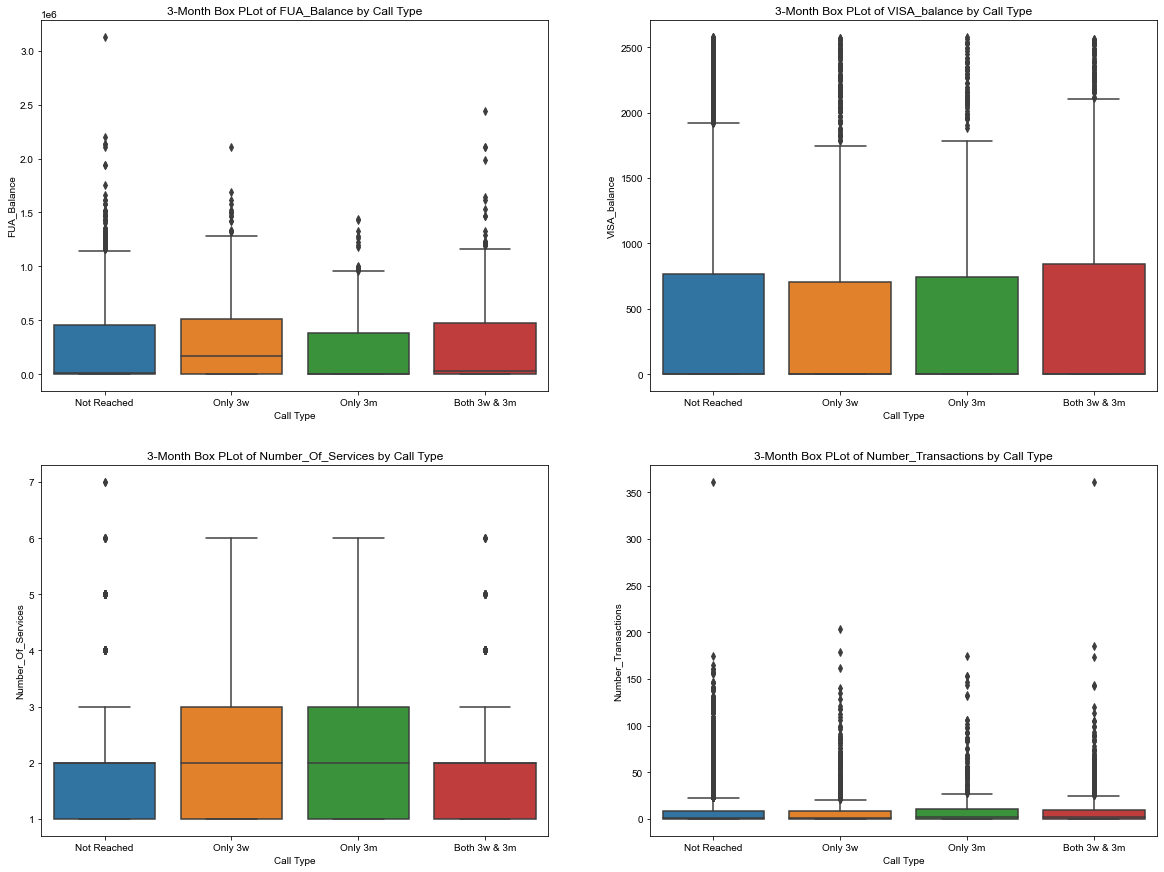

In [ ]:
fig, axes = plt.subplots(2, 2,figsize=(20, 15))
sns.set_style("whitegrid")
for i in range(2):
    for j in range(2):
        indicator = indicators[i*2+j]
        sns.boxplot(data=df_3m, order=choices, ax=axes[i, j], x='Call_Type', y=indicator)
        axes[i, j].set_title(f'3-Month Box PLot of {indicator} by Call Type')
        axes[i, j].set_xlabel('Call Type')
        axes[i, j].set_ylabel(indicator)

plt.show()

#### Horizontal Comparison

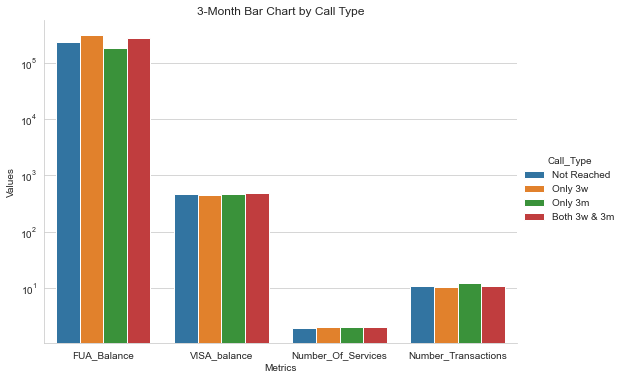

,Call_Type,Metrics,value
0,Both 3w & 3m,FUA_Balance,275699.051024
1,Not Reached,FUA_Balance,242620.752928
2,Only 3m,FUA_Balance,185287.410586
3,Only 3w,FUA_Balance,316869.304972
4,Both 3w & 3m,VISA_balance,484.199860
5,Not Reached,VISA_balance,459.117789
6,Only 3m,VISA_balance,465.259653
7,Only 3w,VISA_balance,447.628035
8,Both 3w & 3m,Number_Of_Services,1.983543
9,Not Reached,Number_Of_Services,1.912720


In [ ]:
df_3m_mean = df_3m.groupby("Call_Type")[indicators].mean().reset_index()
# df_3m_mean = df_3m_mean.transpose()
melted = df_3m_mean.melt(id_vars='Call_Type', var_name='Metrics')
g = sns.catplot(
    data=melted,
    x='Metrics',
    y='value',
    hue='Call_Type',
    hue_order=choices,
    kind='bar',
    aspect=1.5
)
g.set(xlabel='Metrics', ylabel='Values', title='3-Month Bar Chart by Call Type')

plt.xticks(rotation=0)
plt.yscale('log')
plt.show()

melted

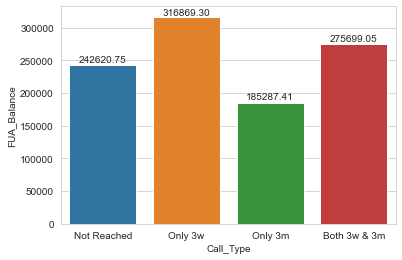

In [ ]:
FUA_Balance_3m_mean = df_3m_mean[['Call_Type', 'FUA_Balance']]
FUA_Balance_3m_mean

g = sns.barplot(
    data=FUA_Balance_3m_mean,
    order=choices,
    x='Call_Type',
    y='FUA_Balance',
)

for p in g.patches:
    g.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()*0.97),
                  ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xticks(rotation=0)
plt.show()

### Within df_6m

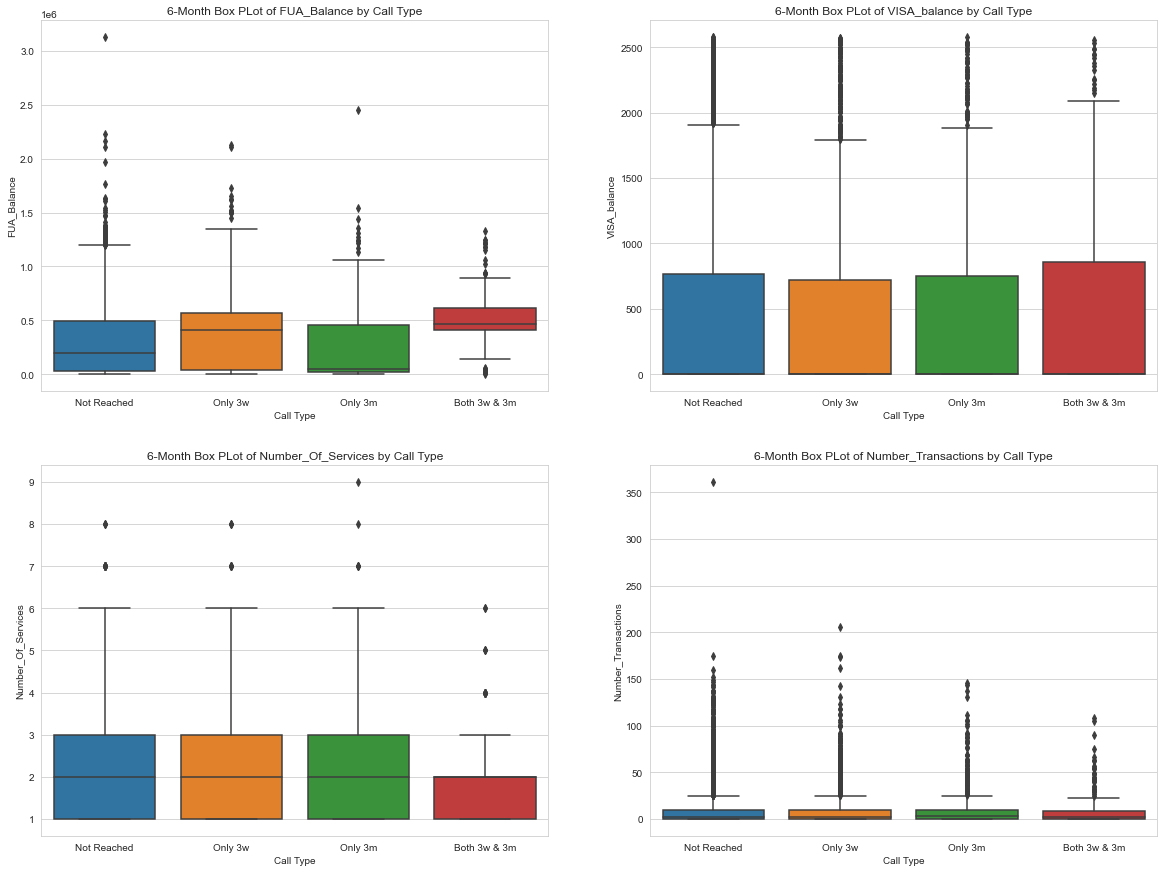

In [ ]:
fig, axes = plt.subplots(2, 2,figsize=(20, 15))
for i in range(2):
    for j in range(2):
        indicator = indicators[i*2+j]
        sns.boxplot(data=df_6m, order=choices, ax=axes[i, j], x='Call_Type', y=indicator)
        axes[i, j].set_title(f'6-Month Box PLot of {indicator} by Call Type')
        axes[i, j].set_xlabel('Call Type')
        axes[i, j].set_ylabel(indicator)

plt.show()

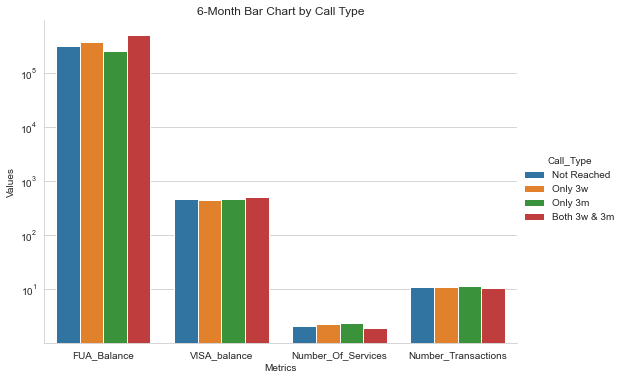

,Call_Type,Metrics,value
0,Both 3w & 3m,FUA_Balance,507164.369885
1,Not Reached,FUA_Balance,318844.391718
2,Only 3m,FUA_Balance,255084.138479
3,Only 3w,FUA_Balance,372331.705147
4,Both 3w & 3m,VISA_balance,517.853145
5,Not Reached,VISA_balance,456.430745
6,Only 3m,VISA_balance,466.136503
7,Only 3w,VISA_balance,447.375767
8,Both 3w & 3m,Number_Of_Services,1.888350
9,Not Reached,Number_Of_Services,2.097503


In [ ]:
df_6m_mean = df_6m.groupby("Call_Type")[indicators].mean().reset_index()
# df_3m_mean = df_3m_mean.transpose()
melted = df_6m_mean.melt(id_vars='Call_Type', var_name='Metrics')
g = sns.catplot(
    data=melted,
    x='Metrics',
    y='value',
    hue='Call_Type',
    hue_order=choices,
    kind='bar',
    aspect=1.5
)
g.set(xlabel='Metrics', ylabel='Values', title='6-Month Bar Chart by Call Type')
plt.xticks(rotation=0)
plt.yscale('log')
plt.show()

melted

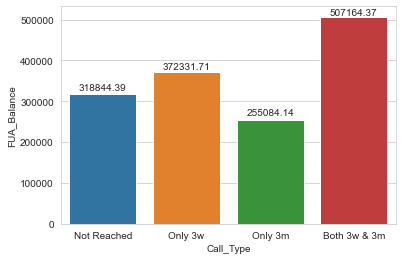

In [ ]:
FUA_Balance_6m_mean = df_6m_mean[['Call_Type', 'FUA_Balance']]
FUA_Balance_6m_mean

g = sns.barplot(
    data=FUA_Balance_6m_mean,
    order=choices,
    x='Call_Type',
    y='FUA_Balance',
)

for p in g.patches:
    g.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()*0.97),
                  ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xticks(rotation=0)
plt.show()

### Comparison Between 3 Month and 6 Month table

In [ ]:
df_3m_mean['Month'] = '3'
df_6m_mean['Month'] = '6'

df_mean_combined = pd.concat([df_3m_mean, df_6m_mean], axis=0)
df_mean_combined

,Call_Type,FUA_Balance,VISA_balance,Number_Of_Services,Number_Transactions,Month
0,Both 3w & 3m,275699.051024,484.199860,1.983543,10.941917,3
1,Not Reached,242620.752928,459.117789,1.912720,10.859269,3
2,Only 3m,185287.410586,465.259653,2.029412,12.233456,3
3,Only 3w,316869.304972,447.628035,2.005982,10.228315,3
0,Both 3w & 3m,507164.369885,517.853145,1.888350,10.514563,6
1,Not Reached,318844.391718,456.430745,2.097503,11.116163,6
2,Only 3m,255084.138479,466.136503,2.361842,11.373355,6
3,Only 3w,372331.705147,447.375767,2.225783,11.094729,6


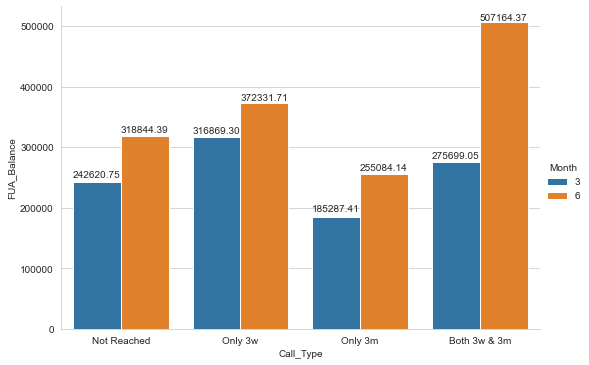

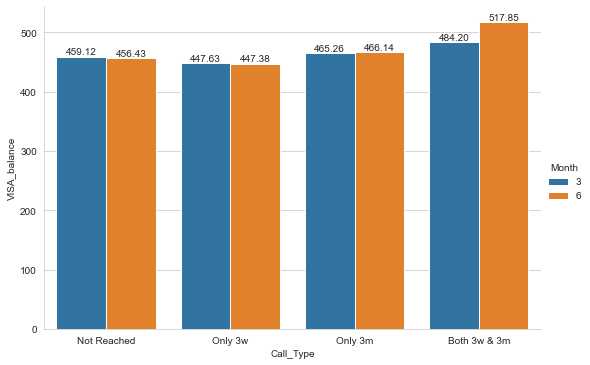

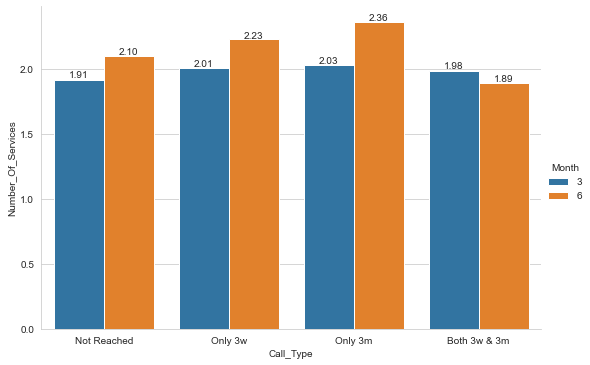

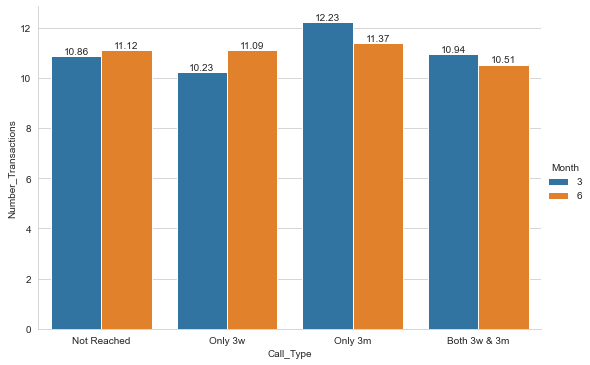

In [ ]:
for i in indicators:
    g = sns.catplot(
        data=df_mean_combined[['Call_Type', i, 'Month']],
        order=choices,
        x='Call_Type',
        y=i,
        hue='Month',
        kind='bar',
        aspect=1.5
    )
    for p in g.ax.patches:
        g.ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()*0.98),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

* If you must cut one call, cut the one at 3-month mark rather than 3-week mark

## Further Segment on different demographic tags (age, income, city, has_xxx) to find which one we should focus the phone call campaign on

### Age

In [ ]:
age_bins = [18, 35, 55, 65, float('inf')]
age_labels = ['Adult', 'Middle-age', 'Pre-retiree', 'Retiree']


df_3m['Age_Group'] = pd.cut(df_3m['Age'], bins=age_bins, labels=age_labels, include_lowest=True)
df_6m['Age_Group'] = pd.cut(df_6m['Age'], bins=age_bins, labels=age_labels, include_lowest=True)

df_3m[['Call_Type', 'Age_Group']].value_counts(), df_6m[['Call_Type', 'Age_Group']].value_counts()

(Call_Type     Age_Group  
 Not Reached   Middle-age     2118
               Pre-retiree    1213
               Retiree         794
 Both 3w & 3m  Middle-age      482
 Only 3w       Middle-age      477
 Not Reached   Adult           309
 Both 3w & 3m  Pre-retiree     282
 Only 3w       Pre-retiree     275
 Only 3m       Middle-age      252
 Both 3w & 3m  Retiree         207
 Only 3w       Retiree         193
 Only 3m       Pre-retiree     146
               Retiree         100
 Both 3w & 3m  Adult            62
 Only 3w       Adult            58
 Only 3m       Adult            46
 dtype: int64,
 Call_Type     Age_Group  
 Not Reached   Middle-age     1819
               Pre-retiree    1023
               Retiree         707
 Only 3w       Middle-age      685
               Pre-retiree     377
 Only 3m       Middle-age      294
 Not Reached   Adult           256
 Only 3w       Retiree         251
 Only 3m       Pre-retiree     155
               Retiree         120
 Only 3w       Adult 

#### FUA

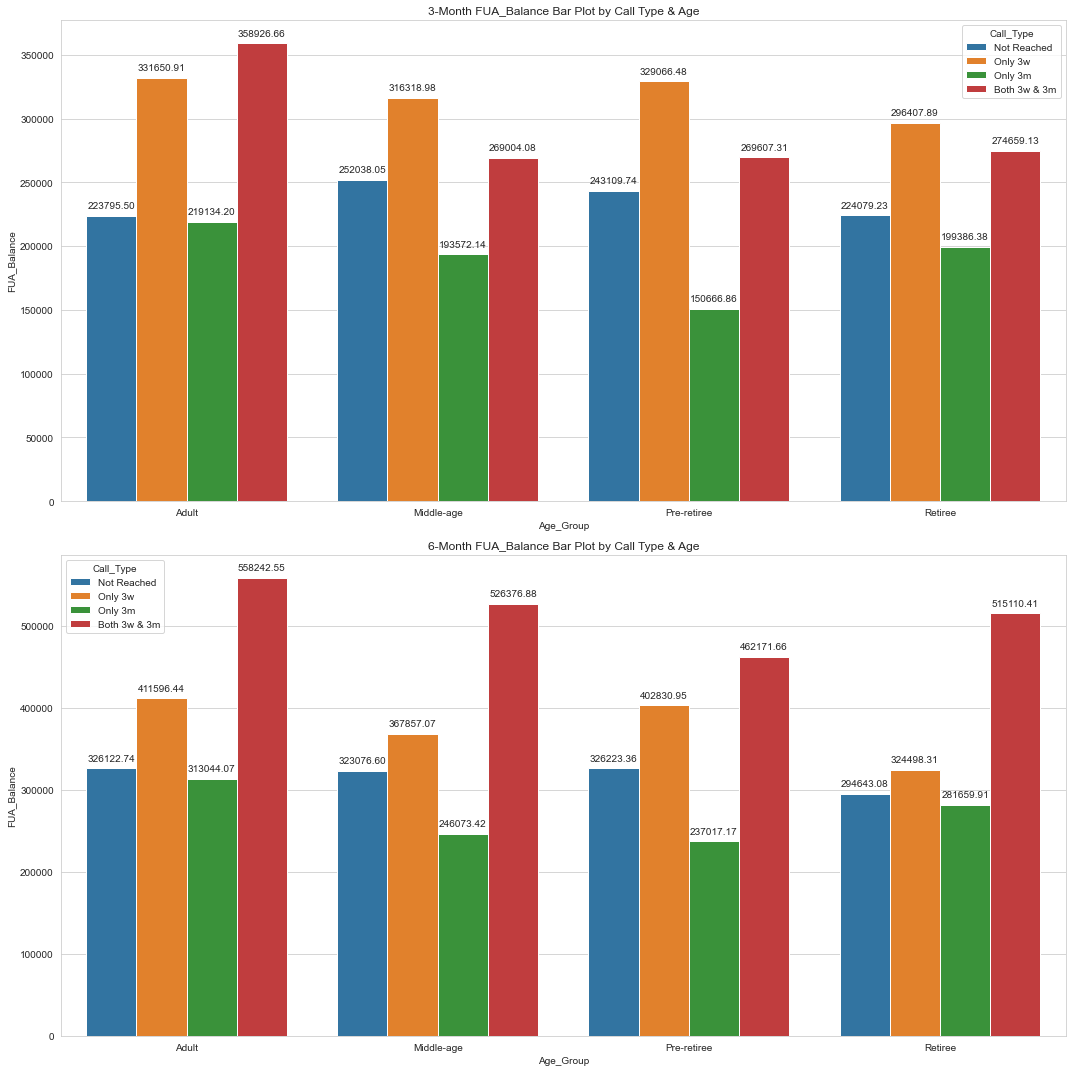

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))

g1 = sns.barplot(
    data=df_3m,
    x='Age_Group',
    y='FUA_Balance',
    hue='Call_Type',
    hue_order=choices,
    ci=None,
    ax=axes[0]
)
g1.set(xlabel='Age_Group', ylabel='FUA_Balance', title='3-Month FUA_Balance Bar Plot by Call Type & Age')
for p in g1.patches:
    g1.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='center', xytext=(0, 10), textcoords='offset points')

g2 = sns.barplot(
    data=df_6m,
    x='Age_Group',
    y='FUA_Balance',
    hue='Call_Type',
    hue_order=choices,
    ci=None,
    ax=axes[1]
)
g2.set(xlabel='Age_Group', ylabel='FUA_Balance', title='6-Month FUA_Balance Bar Plot by Call Type & Age')
for p in g2.patches:
    g2.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

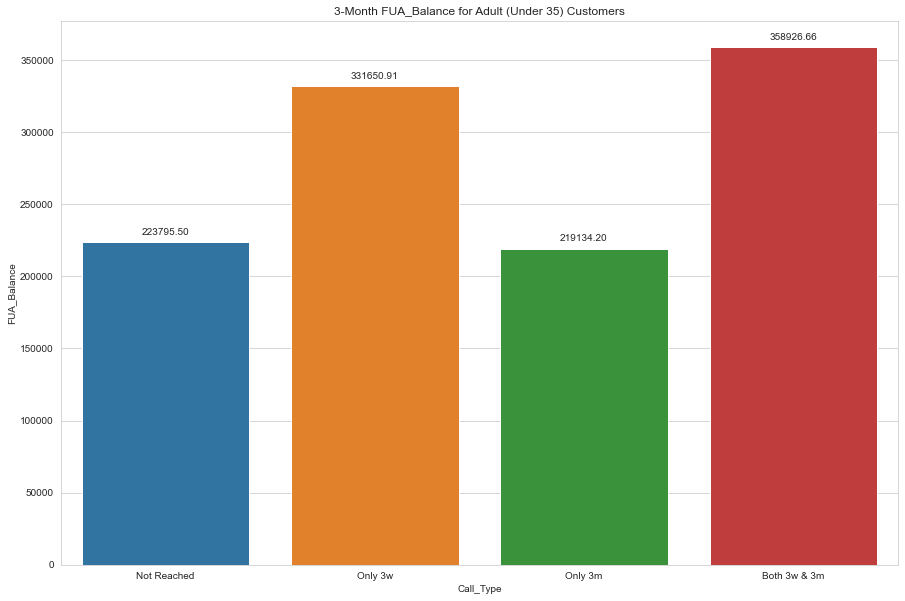

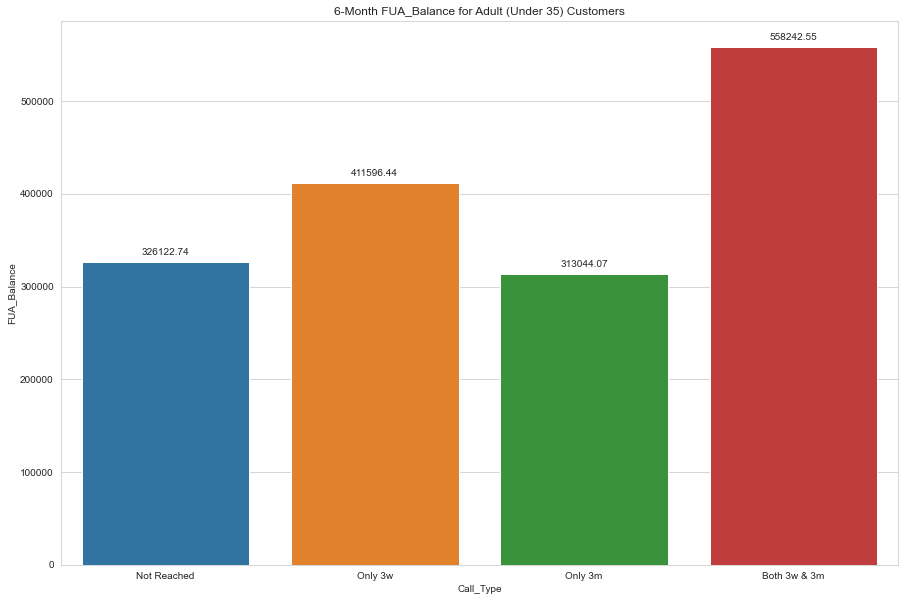

In [ ]:
adult_3m = df_3m[df_3m['Age_Group']=='Adult']
adult_6m = df_6m[df_6m['Age_Group']=='Adult']

g3 = sns.barplot(
    data=adult_3m,
    x='Call_Type',
    y='FUA_Balance',
    order=choices,
    ci=None
)
for p in g3.patches:
    g3.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='center', xytext=(0, 10), textcoords='offset points')
g3.set(xlabel='Call_Type', ylabel='FUA_Balance', title='3-Month FUA_Balance for Adult (Under 35) Customers')
plt.gcf().set_size_inches(15,10)
plt.show()

g4 = sns.barplot(
    data=adult_6m,
    x='Call_Type',
    y='FUA_Balance',
    order=choices,
    ci=None
)
for p in g4.patches:
    g4.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='center', xytext=(0, 10), textcoords='offset points')
g4.set(xlabel='Call_Type', ylabel='FUA_Balance', title='6-Month FUA_Balance for Adult (Under 35) Customers')
plt.gcf().set_size_inches(15,10)
plt.show()

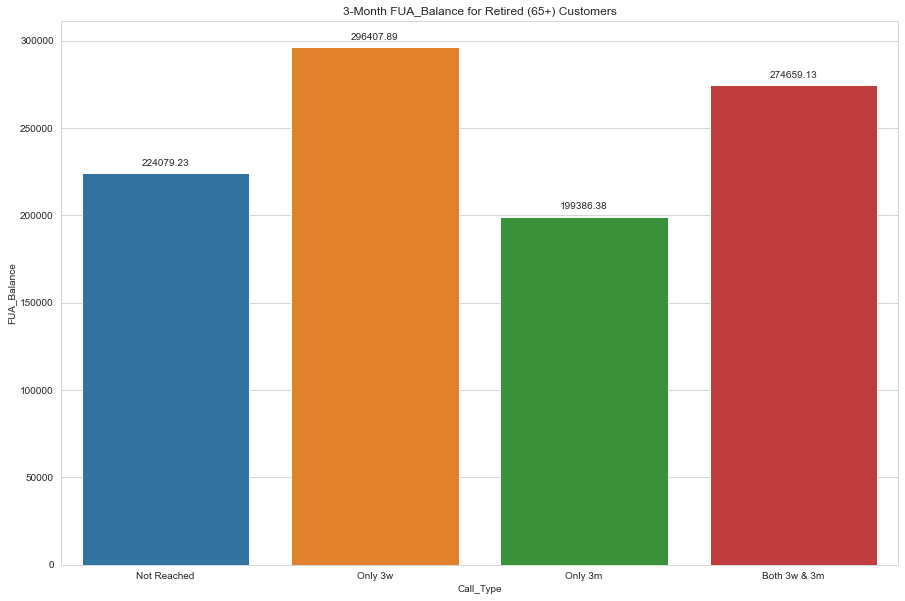

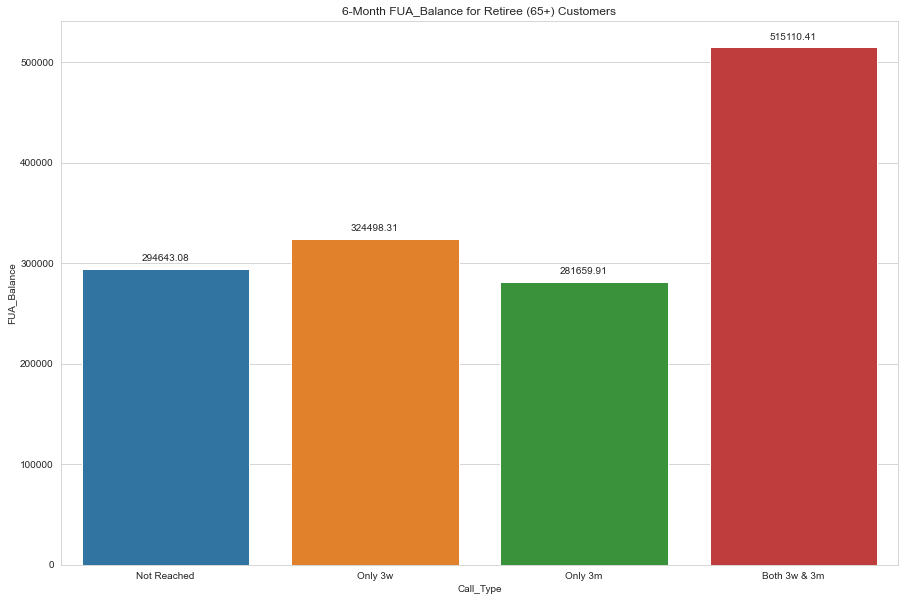

In [ ]:
retiree_3m = df_3m[df_3m['Age_Group']=='Retiree']
retiree_6m = df_6m[df_6m['Age_Group']=='Retiree']

g3 = sns.barplot(
    data=retiree_3m,
    x='Call_Type',
    y='FUA_Balance',
    order=choices,
    ci=None
)
for p in g3.patches:
    g3.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='center', xytext=(0, 10), textcoords='offset points')
g3.set(xlabel='Call_Type', ylabel='FUA_Balance', title='3-Month FUA_Balance for Retired (65+) Customers')
plt.gcf().set_size_inches(15,10)
plt.show()

g4 = sns.barplot(
    data=retiree_6m,
    x='Call_Type',
    y='FUA_Balance',
    order=choices,
    ci=None
)
for p in g4.patches:
    g4.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='center', xytext=(0, 10), textcoords='offset points')
g4.set(xlabel='Call_Type', ylabel='FUA_Balance', title='6-Month FUA_Balance for Retiree (65+) Customers')
plt.gcf().set_size_inches(15,10)
plt.show()

#### VISA

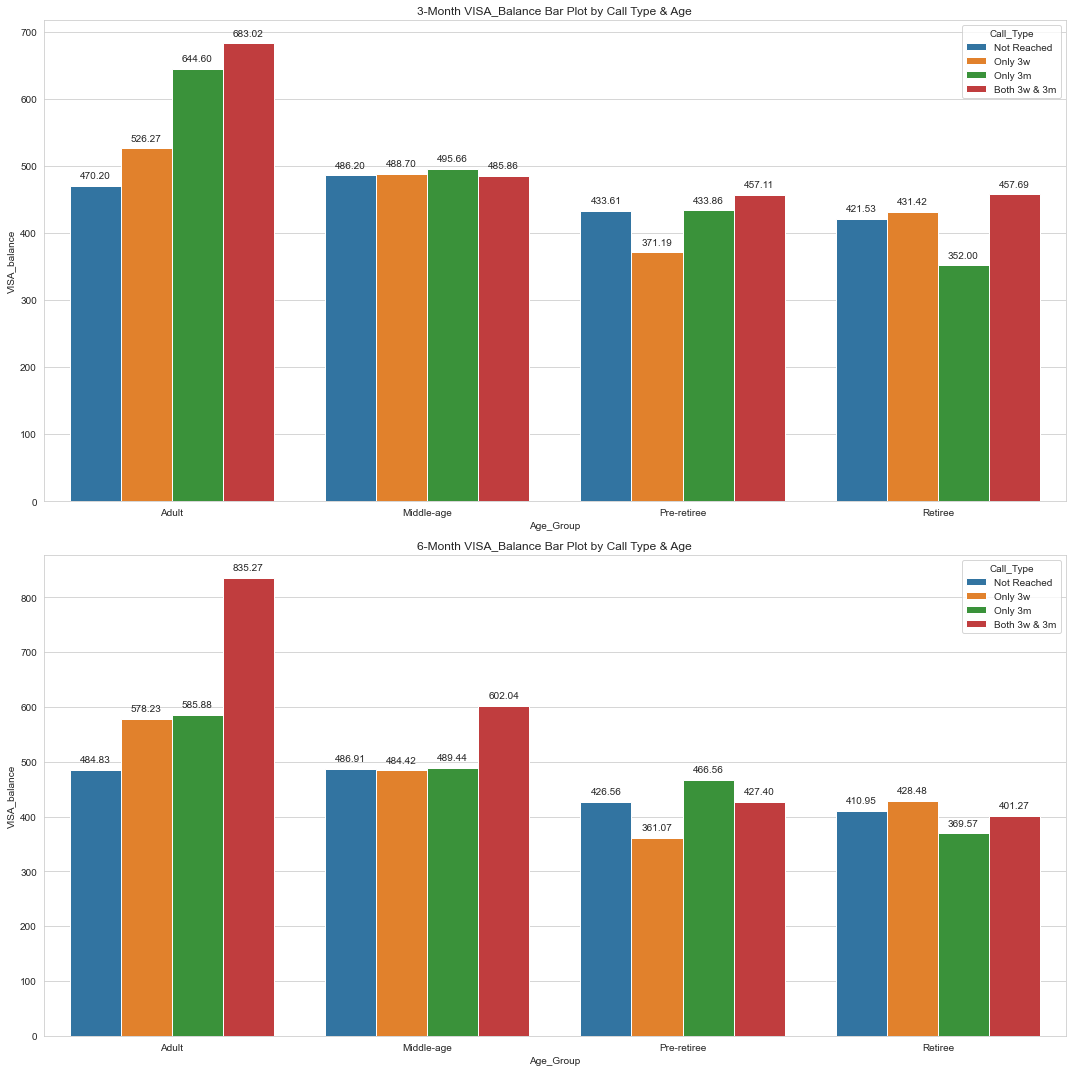

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))

g1 = sns.barplot(
    data=df_3m,
    x='Age_Group',
    y='VISA_balance',
    hue='Call_Type',
    hue_order=choices,
    ci=None,
    ax=axes[0]
)
g1.set(xlabel='Age_Group', ylabel='VISA_balance', title='3-Month VISA_Balance Bar Plot by Call Type & Age')
for p in g1.patches:
    g1.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='center', xytext=(0, 10), textcoords='offset points')

g2 = sns.barplot(
    data=df_6m,
    x='Age_Group',
    y='VISA_balance',
    hue='Call_Type',
    hue_order=choices,
    ci=None,
    ax=axes[1]
)
g2.set(xlabel='Age_Group', ylabel='VISA_balance', title='6-Month VISA_Balance Bar Plot by Call Type & Age')
for p in g2.patches:
    g2.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

#### Transaction

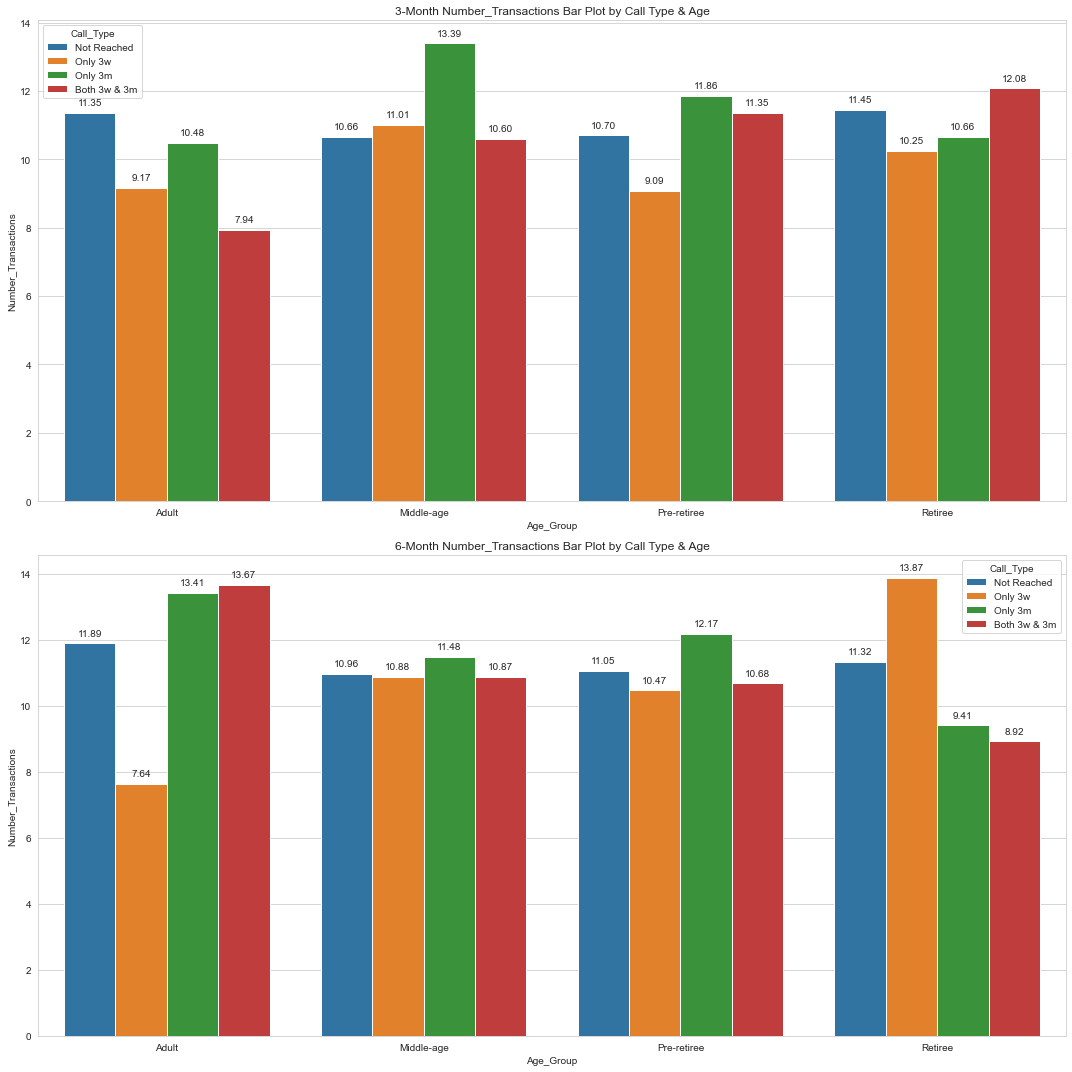

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))

g1 = sns.barplot(
    data=df_3m,
    x='Age_Group',
    y='Number_Transactions',
    hue='Call_Type',
    hue_order=choices,
    ci=None,
    ax=axes[0]
)
g1.set(xlabel='Age_Group', ylabel='Number_Transactions', title='3-Month Number_Transactions Bar Plot by Call Type & Age')
for p in g1.patches:
    g1.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='center', xytext=(0, 10), textcoords='offset points')

g2 = sns.barplot(
    data=df_6m,
    x='Age_Group',
    y='Number_Transactions',
    hue='Call_Type',
    hue_order=choices,
    ci=None,
    ax=axes[1]
)
g2.set(xlabel='Age_Group', ylabel='Number_Transactions', title='6-Month Number_Transactions Bar Plot by Call Type & Age')
for p in g2.patches:
    g2.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

### Income

In [ ]:
df_3m_income = df_3m[df_3m['Income'].notna()].copy()
df_6m_income = df_6m[df_6m['Income'].notna()].copy()

income_bins = [0, 70000, 150000, 220000, float('inf')]
income_labels = ['Low', 'Middle', 'High', 'Extra-High']

df_3m_income['Income_Group'] = pd.cut(df_3m_income['Income'], bins=income_bins, labels=income_labels, include_lowest=True)
df_6m_income['Income_Group'] = pd.cut(df_6m_income['Income'], bins=income_bins, labels=income_labels, include_lowest=True)

df_3m_income[['Call_Type', 'Income_Group']].value_counts(), df_6m_income[['Call_Type', 'Income_Group']].value_counts()

(Call_Type     Income_Group
 Not Reached   High            93
               Extra-High      89
               Middle          78
               Low             76
 Both 3w & 3m  Low             24
               Extra-High      23
               High            20
               Middle          18
 Only 3m       Extra-High      13
 Only 3w       Extra-High      13
               Low             12
               Middle          12
 Only 3m       Low             11
 Only 3w       High            11
 Only 3m       High            10
               Middle           5
 dtype: int64,
 Call_Type     Income_Group
 Not Reached   Extra-High      82
               High            72
               Low             63
               Middle          59
 Only 3w       High            27
               Middle          26
               Extra-High      26
               Low             21
 Only 3m       Extra-High      16
               Low             11
               High             7
 Both 3w & 

#### FUA

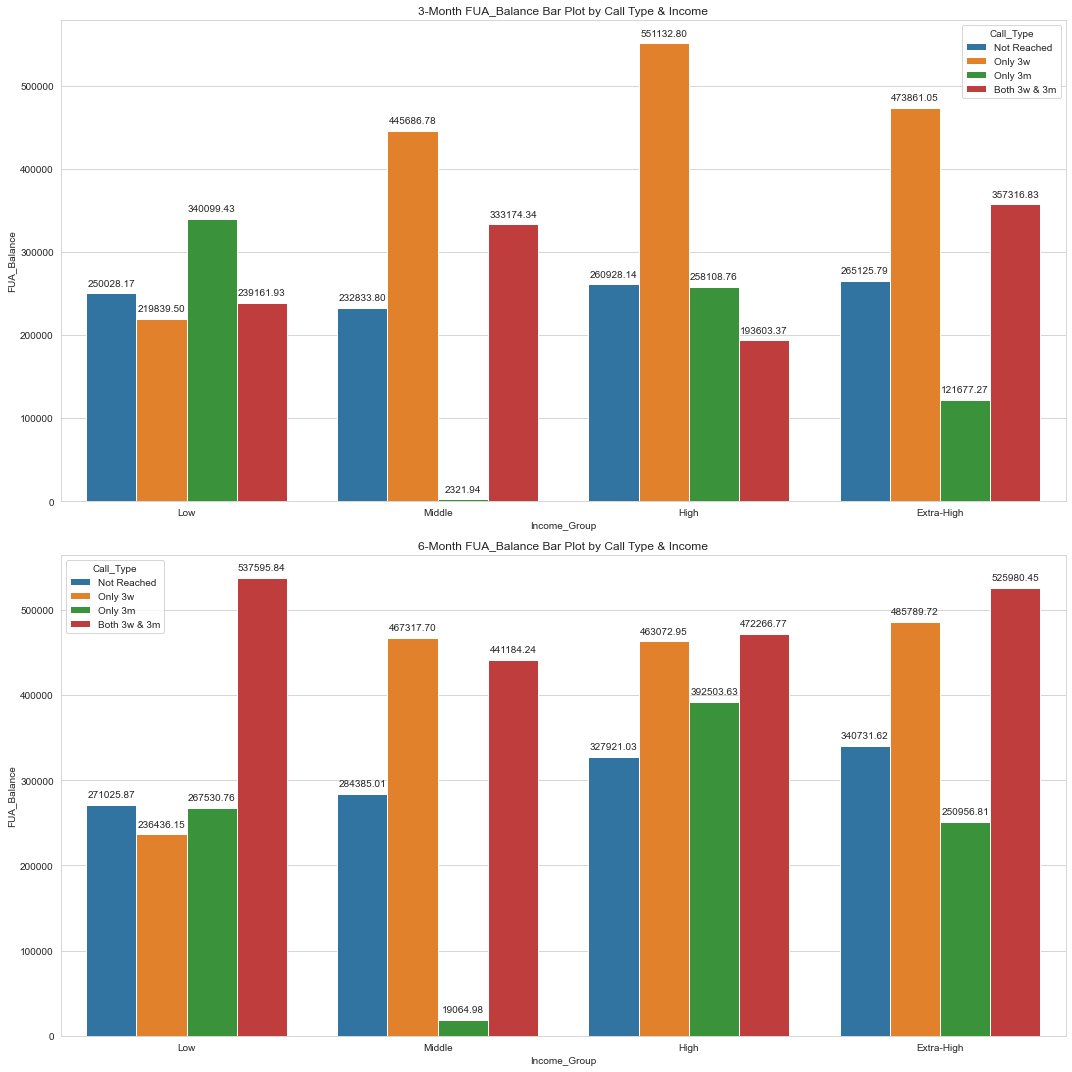

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))

g1 = sns.barplot(
    data=df_3m_income,
    x='Income_Group',
    y='FUA_Balance',
    hue='Call_Type',
    hue_order=choices,
    ci=None,
    ax=axes[0]
)
g1.set(xlabel='Income_Group', ylabel='FUA_Balance', title='3-Month FUA_Balance Bar Plot by Call Type & Income')
for p in g1.patches:
    g1.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='center', xytext=(0, 10), textcoords='offset points')

g2 = sns.barplot(
    data=df_6m_income,
    x='Income_Group',
    y='FUA_Balance',
    hue='Call_Type',
    hue_order=choices,
    ci=None,
    ax=axes[1]
)
g2.set(xlabel='Income_Group', ylabel='FUA_Balance', title='6-Month FUA_Balance Bar Plot by Call Type & Income')
for p in g2.patches:
    g2.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

#### VISA

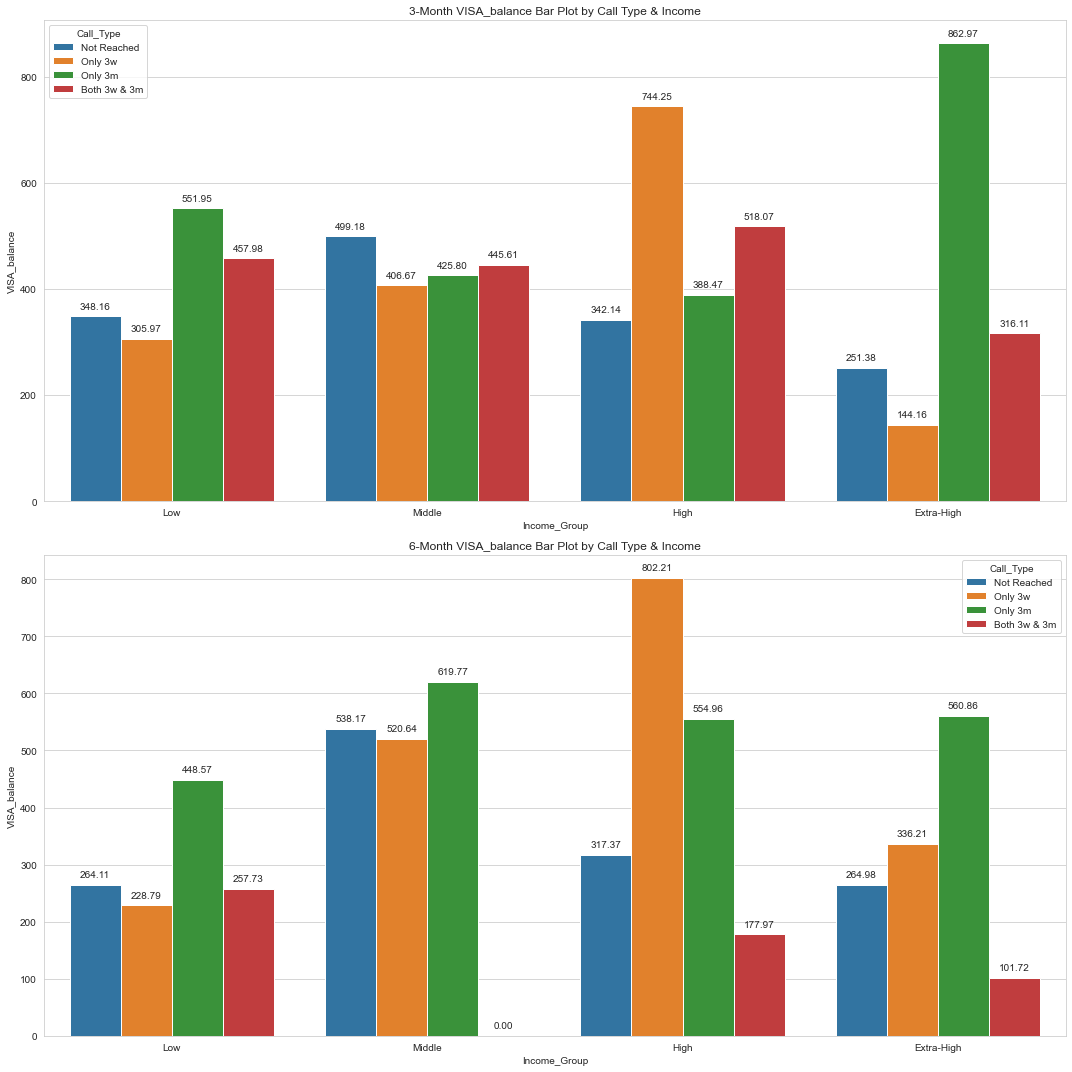

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))

g1 = sns.barplot(
    data=df_3m_income,
    x='Income_Group',
    y='VISA_balance',
    hue='Call_Type',
    hue_order=choices,
    ci=None,
    ax=axes[0]
)
g1.set(xlabel='Income_Group', ylabel='VISA_balance', title='3-Month VISA_balance Bar Plot by Call Type & Income')
for p in g1.patches:
    g1.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='center', xytext=(0, 10), textcoords='offset points')

g2 = sns.barplot(
    data=df_6m_income,
    x='Income_Group',
    y='VISA_balance',
    hue='Call_Type',
    hue_order=choices,
    ci=None,
    ax=axes[1]
)
g2.set(xlabel='Income_Group', ylabel='VISA_balance', title='6-Month VISA_balance Bar Plot by Call Type & Income')
for p in g2.patches:
    g2.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

#### Transaction

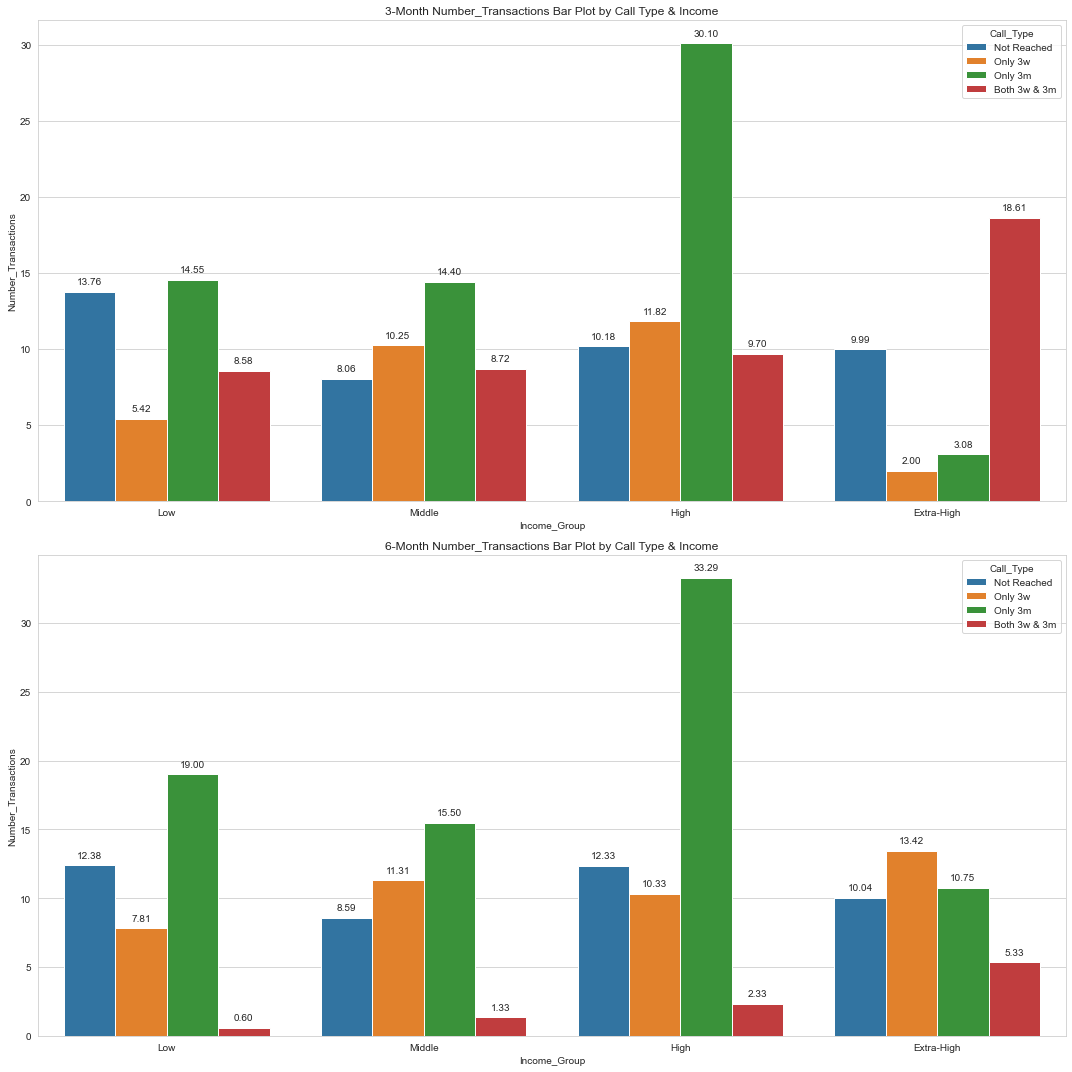

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))

g1 = sns.barplot(
    data=df_3m_income,
    x='Income_Group',
    y='Number_Transactions',
    hue='Call_Type',
    hue_order=choices,
    ci=None,
    ax=axes[0]
)
g1.set(xlabel='Income_Group', ylabel='Number_Transactions', title='3-Month Number_Transactions Bar Plot by Call Type & Income')
for p in g1.patches:
    g1.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='center', xytext=(0, 10), textcoords='offset points')

g2 = sns.barplot(
    data=df_6m_income,
    x='Income_Group',
    y='Number_Transactions',
    hue='Call_Type',
    hue_order=choices,
    ci=None,
    ax=axes[1]
)
g2.set(xlabel='Income_Group', ylabel='Number_Transactions', title='6-Month Number_Transactions Bar Plot by Call Type & Income')
for p in g2.patches:
    g2.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

* Customers with middle-level income have higher FUA if called only at 3 week mark
* For customers with high-level income, calling at both 3-week and 3-month doesn't increase their FUA a lot more than only calling at 3-week mark

### City (TODO)

In [ ]:
df_3m_city_mean = df_3m.groupby(["Call_Type",'City'])[indicators].mean().reset_index()
df_6m_city_mean = df_6m.groupby(["Call_Type",'City'])[indicators].mean().reset_index()
df_3m_city_mean

,Call_Type,City,FUA_Balance,VISA_balance,Number_Of_Services,Number_Transactions
0,Both 3w & 3m,108 MILE RANCH,2540.150000,0.000000,1.000000,0.000000
1,Both 3w & 3m,ABBOTSFORD,306354.575556,455.798534,2.037037,8.888889
2,Both 3w & 3m,AGASSIZ,2207.370000,2517.738949,1.000000,15.000000
3,Both 3w & 3m,ALDERGROVE,291015.193067,52.110442,1.666667,24.000000
4,Both 3w & 3m,ALERT BAY,487147.709300,0.000000,1.000000,9.000000
...,...,...,...,...,...,...
304,Only 3w,WEST VANCOUVER,345474.296367,371.980493,1.750000,10.666667
305,Only 3w,WHISTLER,332050.527550,187.522840,3.500000,27.000000
306,Only 3w,WHITE ROCK,117660.158675,1169.923102,1.750000,11.000000
307,Only 3w,WILLIAMS LAKE,14589.495000,569.033252,1.000000,34.000000


In [ ]:
v = df_3m['City'].value_counts()
df_3m_city_mean = df_3m_city_mean[df_3m_city_mean['City'].isin(v.index[v.gt(100)])]

v = df_6m['City'].value_counts()
df_6m_city_mean = df_6m_city_mean[df_6m_city_mean['City'].isin(v.index[v.gt(100)])]

#### FUA

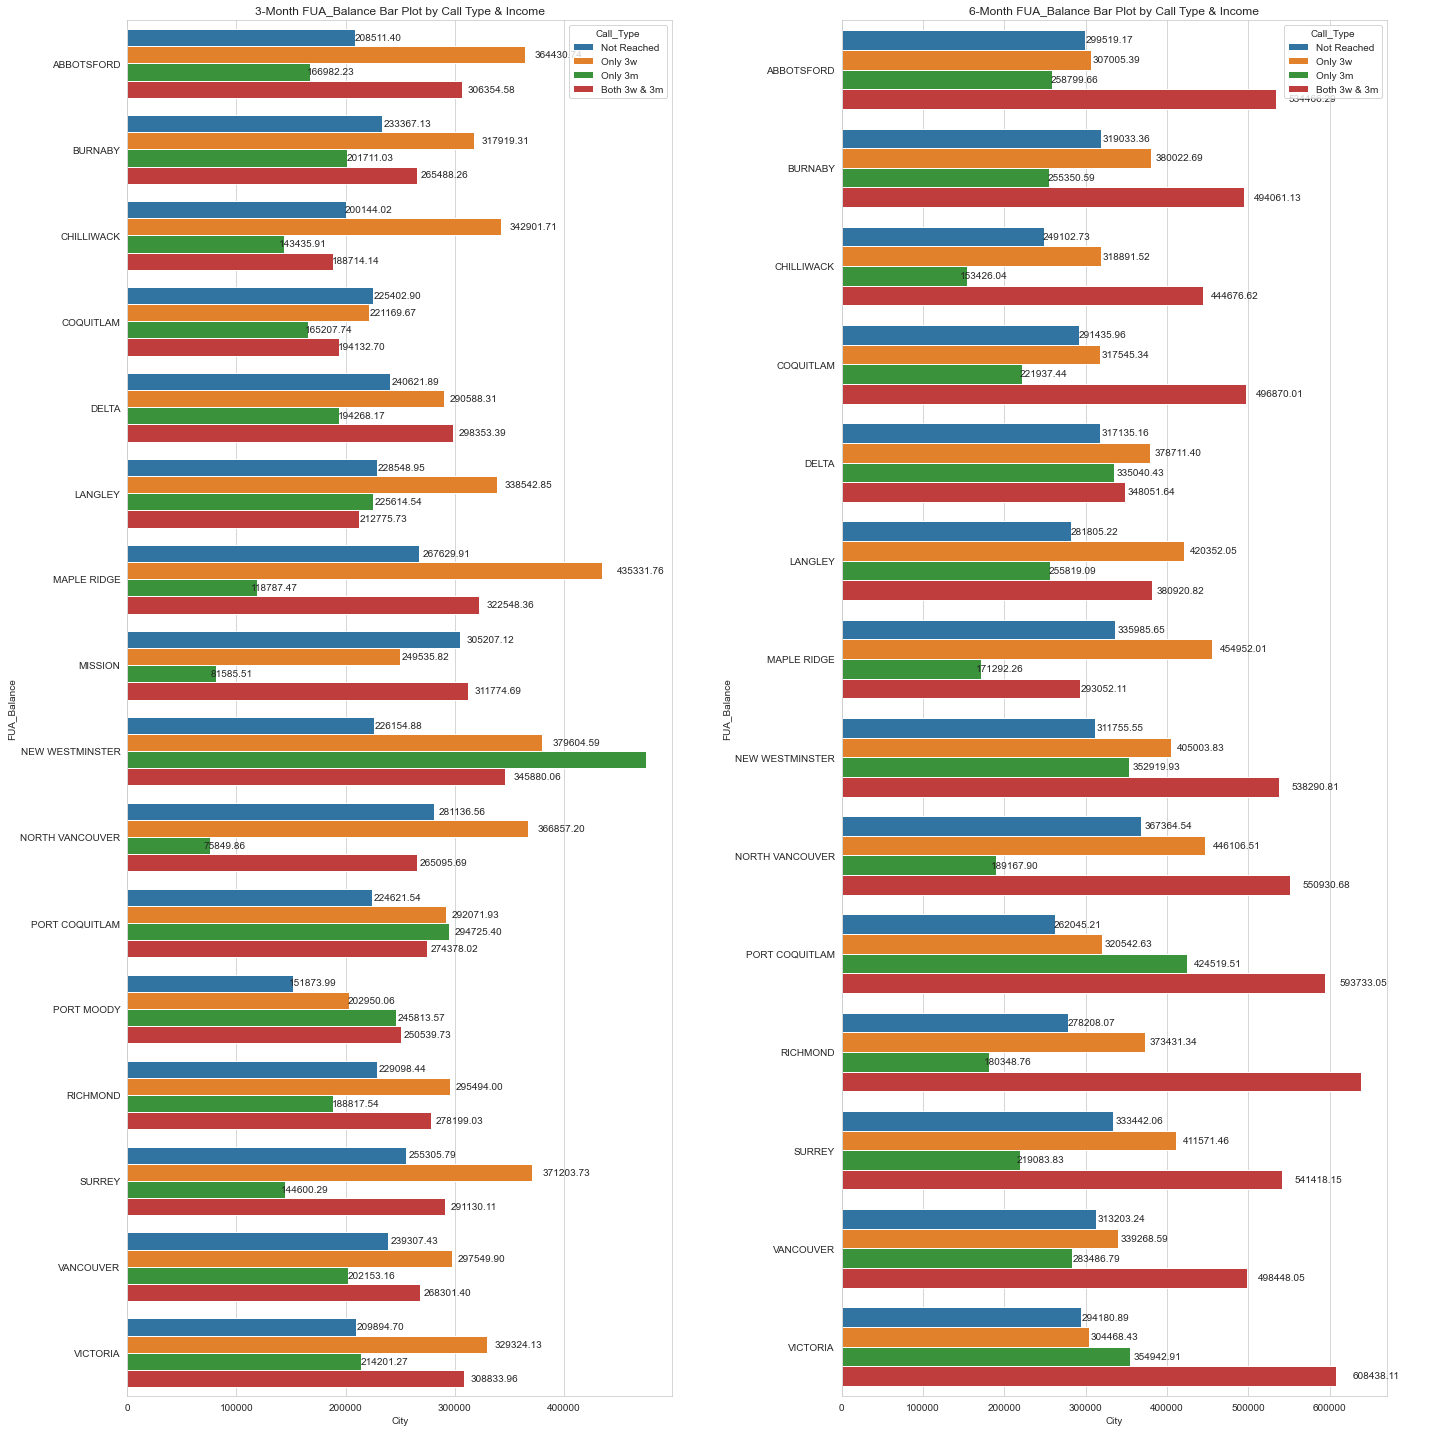

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 20))

g1 = sns.barplot(
    data=df_3m_city_mean,
    x='FUA_Balance',
    y='City',
    hue='Call_Type',
    hue_order=choices,
    ax=axes[0]
)
g1.set(xlabel='City', ylabel='FUA_Balance', title='3-Month FUA_Balance Bar Plot by Call Type & Income')
for p in g1.patches:
    g1.annotate(f'{p.get_width():.2f}', (p.get_width()*1.06, p.get_y() + p.get_height() / 2.),
                  ha='center', va='center', xytext=(10, 0), textcoords='offset points')

g2 = sns.barplot(
    data=df_6m_city_mean,
    x='FUA_Balance',
    y='City',
    hue='Call_Type',
    hue_order=choices,
    ax=axes[1]
)
g2.set(xlabel='City', ylabel='FUA_Balance', title='6-Month FUA_Balance Bar Plot by Call Type & Income')
for p in g2.patches:
    g2.annotate(f'{p.get_width():.2f}', (p.get_width()*1.06, p.get_y() + p.get_height() / 2.),
                  ha='center', va='center', xytext=(10, 0), textcoords='offset points')

plt.tight_layout()
plt.show()

In [ ]:
maple_ridge_3m = df_3m[df_3m['City']=='MAPLE RIDGE']
maple_ridge_6m = df_6m[df_6m['City']=='MAPLE RIDGE']

langley_3m = df_3m[df_3m['City']=='LANGLEY']
langley_6m = df_6m[df_6m['City']=='LANGLEY']

maple_ridge_3m['Call_Type'].value_counts(), maple_ridge_6m['Call_Type'].value_counts(), langley_3m['Call_Type'].value_counts(), langley_6m['Call_Type'].value_counts()

(Not Reached     159
 Both 3w & 3m     36
 Only 3w          34
 Only 3m          16
 Name: Call_Type, dtype: int64,
 Not Reached     131
 Only 3w          52
 Only 3m          22
 Both 3w & 3m      6
 Name: Call_Type, dtype: int64,
 Not Reached     126
 Both 3w & 3m     35
 Only 3w          28
 Only 3m          18
 Name: Call_Type, dtype: int64,
 Not Reached     106
 Only 3w          52
 Only 3m          16
 Both 3w & 3m      6
 Name: Call_Type, dtype: int64)

* Customers in Maple Ridge and Langley prefer 3-week-mark call only, rather than both 3-week and 3-month mark